<a href="https://colab.research.google.com/github/TheRadDani/Contrastive-Learning-to-color-image/blob/main/Contrastive_Learning_to_color_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using device: cuda
Loading dataset...


100%|██████████| 170M/170M [00:13<00:00, 12.9MB/s]


Initializing model...
Total parameters: 14,784,386
Starting training...
Epoch 1/30, Batch 0, Loss: 0.0922
Epoch 1/30, Batch 100, Loss: 0.0097
Epoch 1/30, Batch 200, Loss: 0.0100
Epoch 1/30, Batch 300, Loss: 0.0123
Epoch 1/30, Batch 400, Loss: 0.0100
Epoch 1/30, Batch 500, Loss: 0.0132
Epoch 1/30, Batch 600, Loss: 0.0098
Epoch 1/30, Batch 700, Loss: 0.0119
Epoch 1/30, Batch 800, Loss: 0.0068
Epoch 1/30, Batch 900, Loss: 0.0089
Epoch 1/30, Batch 1000, Loss: 0.0093
Epoch 1/30, Batch 1100, Loss: 0.0132
Epoch 1/30, Batch 1200, Loss: 0.0095
Epoch 1/30, Batch 1300, Loss: 0.0106
Epoch 1/30, Batch 1400, Loss: 0.0088
Epoch 1/30, Batch 1500, Loss: 0.0080
Epoch 1/30 completed. Average Loss: 0.0107
Epoch 2/30, Batch 0, Loss: 0.0092
Epoch 2/30, Batch 100, Loss: 0.0082
Epoch 2/30, Batch 200, Loss: 0.0089
Epoch 2/30, Batch 300, Loss: 0.0103
Epoch 2/30, Batch 400, Loss: 0.0081
Epoch 2/30, Batch 500, Loss: 0.0125
Epoch 2/30, Batch 600, Loss: 0.0091
Epoch 2/30, Batch 700, Loss: 0.0099
Epoch 2/30, Batch 8

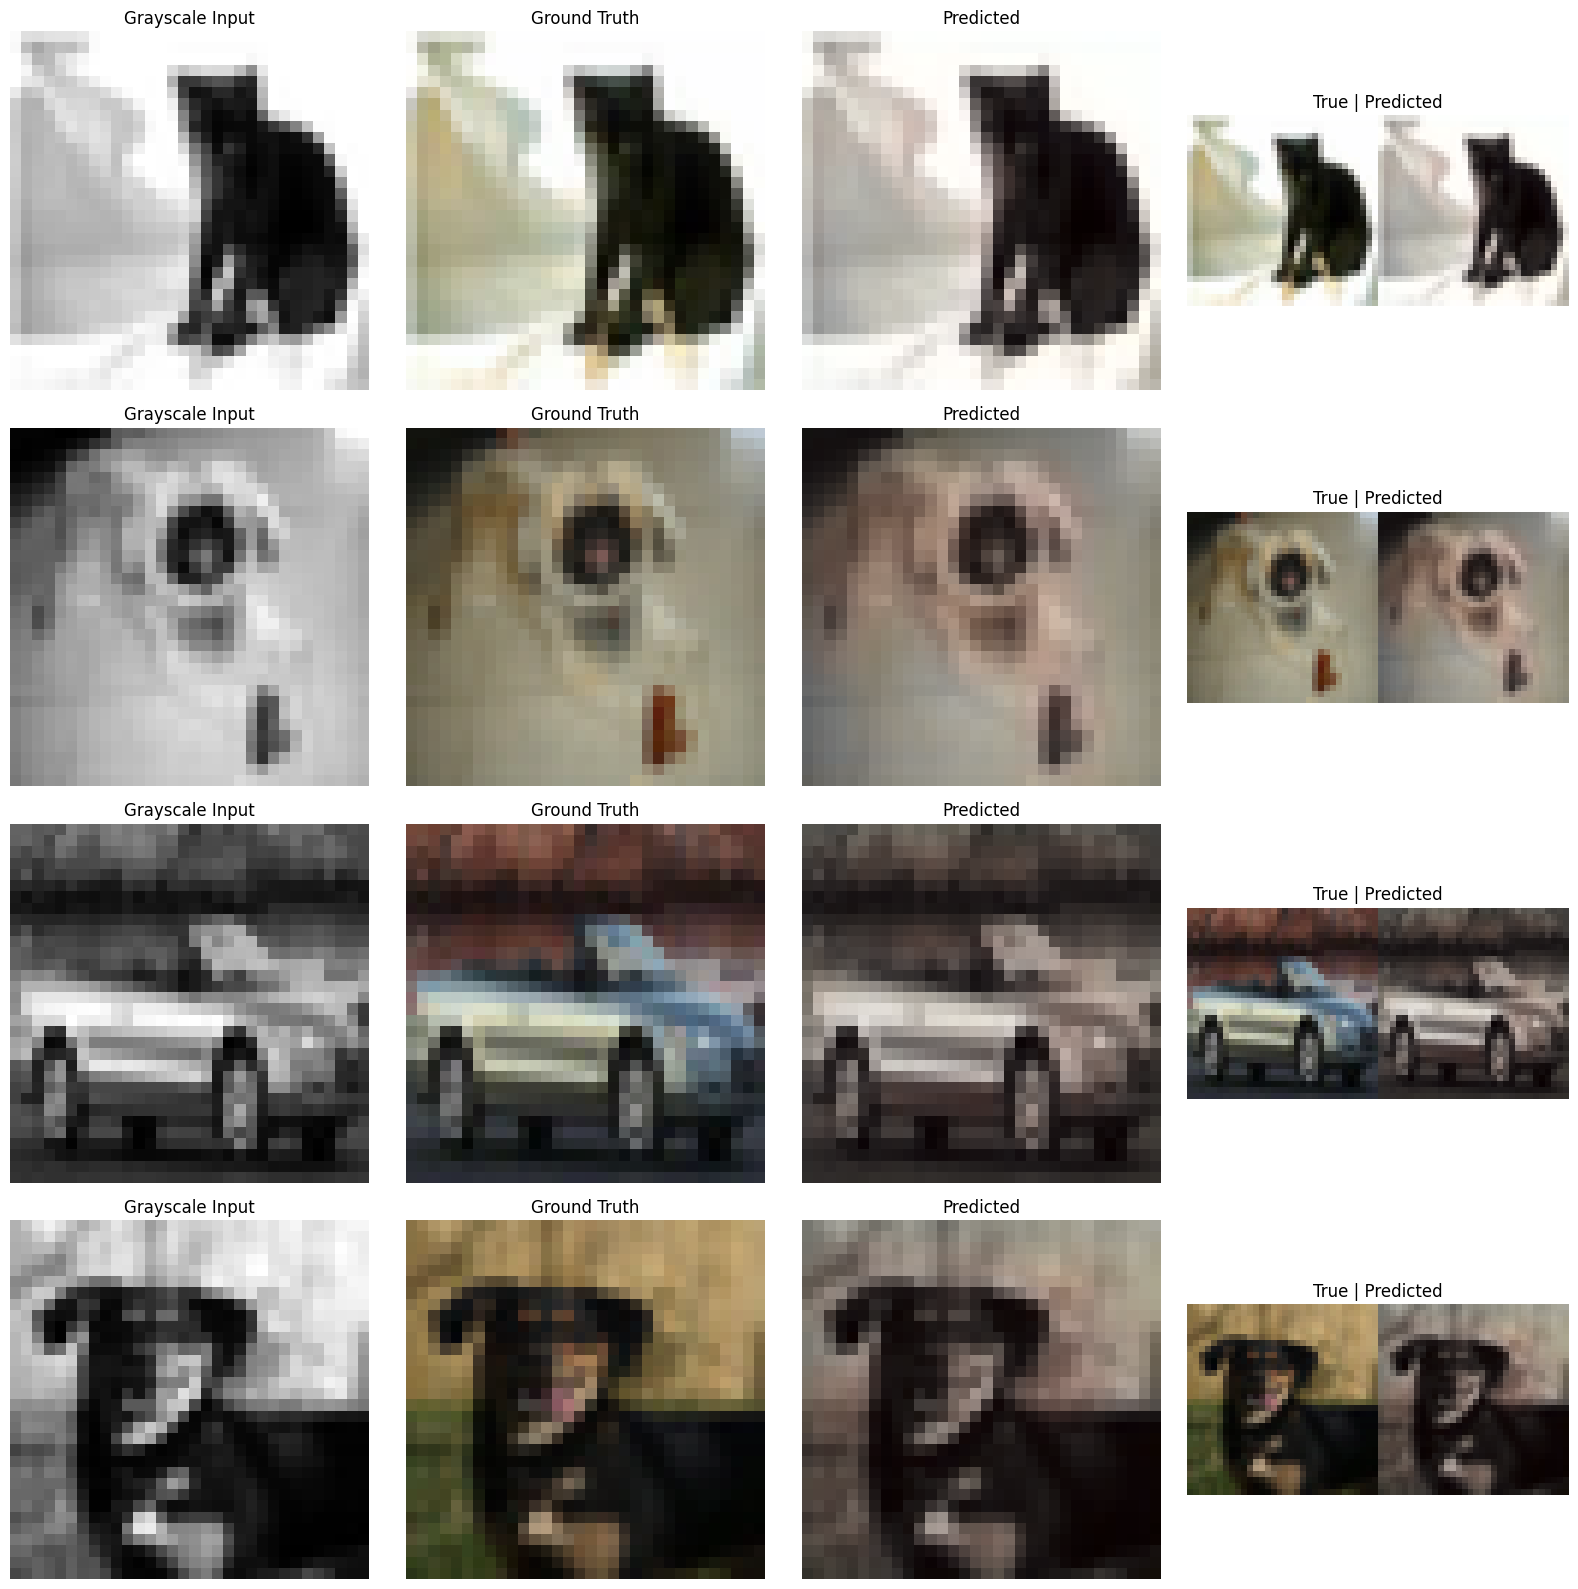

Epoch 11/30, Batch 0, Loss: 0.0091
Epoch 11/30, Batch 100, Loss: 0.0096
Epoch 11/30, Batch 200, Loss: 0.0071
Epoch 11/30, Batch 300, Loss: 0.0127
Epoch 11/30, Batch 400, Loss: 0.0092
Epoch 11/30, Batch 500, Loss: 0.0085
Epoch 11/30, Batch 600, Loss: 0.0094
Epoch 11/30, Batch 700, Loss: 0.0078
Epoch 11/30, Batch 800, Loss: 0.0069
Epoch 11/30, Batch 900, Loss: 0.0096
Epoch 11/30, Batch 1000, Loss: 0.0109
Epoch 11/30, Batch 1100, Loss: 0.0118
Epoch 11/30, Batch 1200, Loss: 0.0135
Epoch 11/30, Batch 1300, Loss: 0.0080
Epoch 11/30, Batch 1400, Loss: 0.0080
Epoch 11/30, Batch 1500, Loss: 0.0076
Epoch 11/30 completed. Average Loss: 0.0095
Epoch 12/30, Batch 0, Loss: 0.0090
Epoch 12/30, Batch 100, Loss: 0.0069
Epoch 12/30, Batch 200, Loss: 0.0122
Epoch 12/30, Batch 300, Loss: 0.0101
Epoch 12/30, Batch 400, Loss: 0.0092
Epoch 12/30, Batch 500, Loss: 0.0110
Epoch 12/30, Batch 600, Loss: 0.0084
Epoch 12/30, Batch 700, Loss: 0.0089
Epoch 12/30, Batch 800, Loss: 0.0088
Epoch 12/30, Batch 900, Loss:

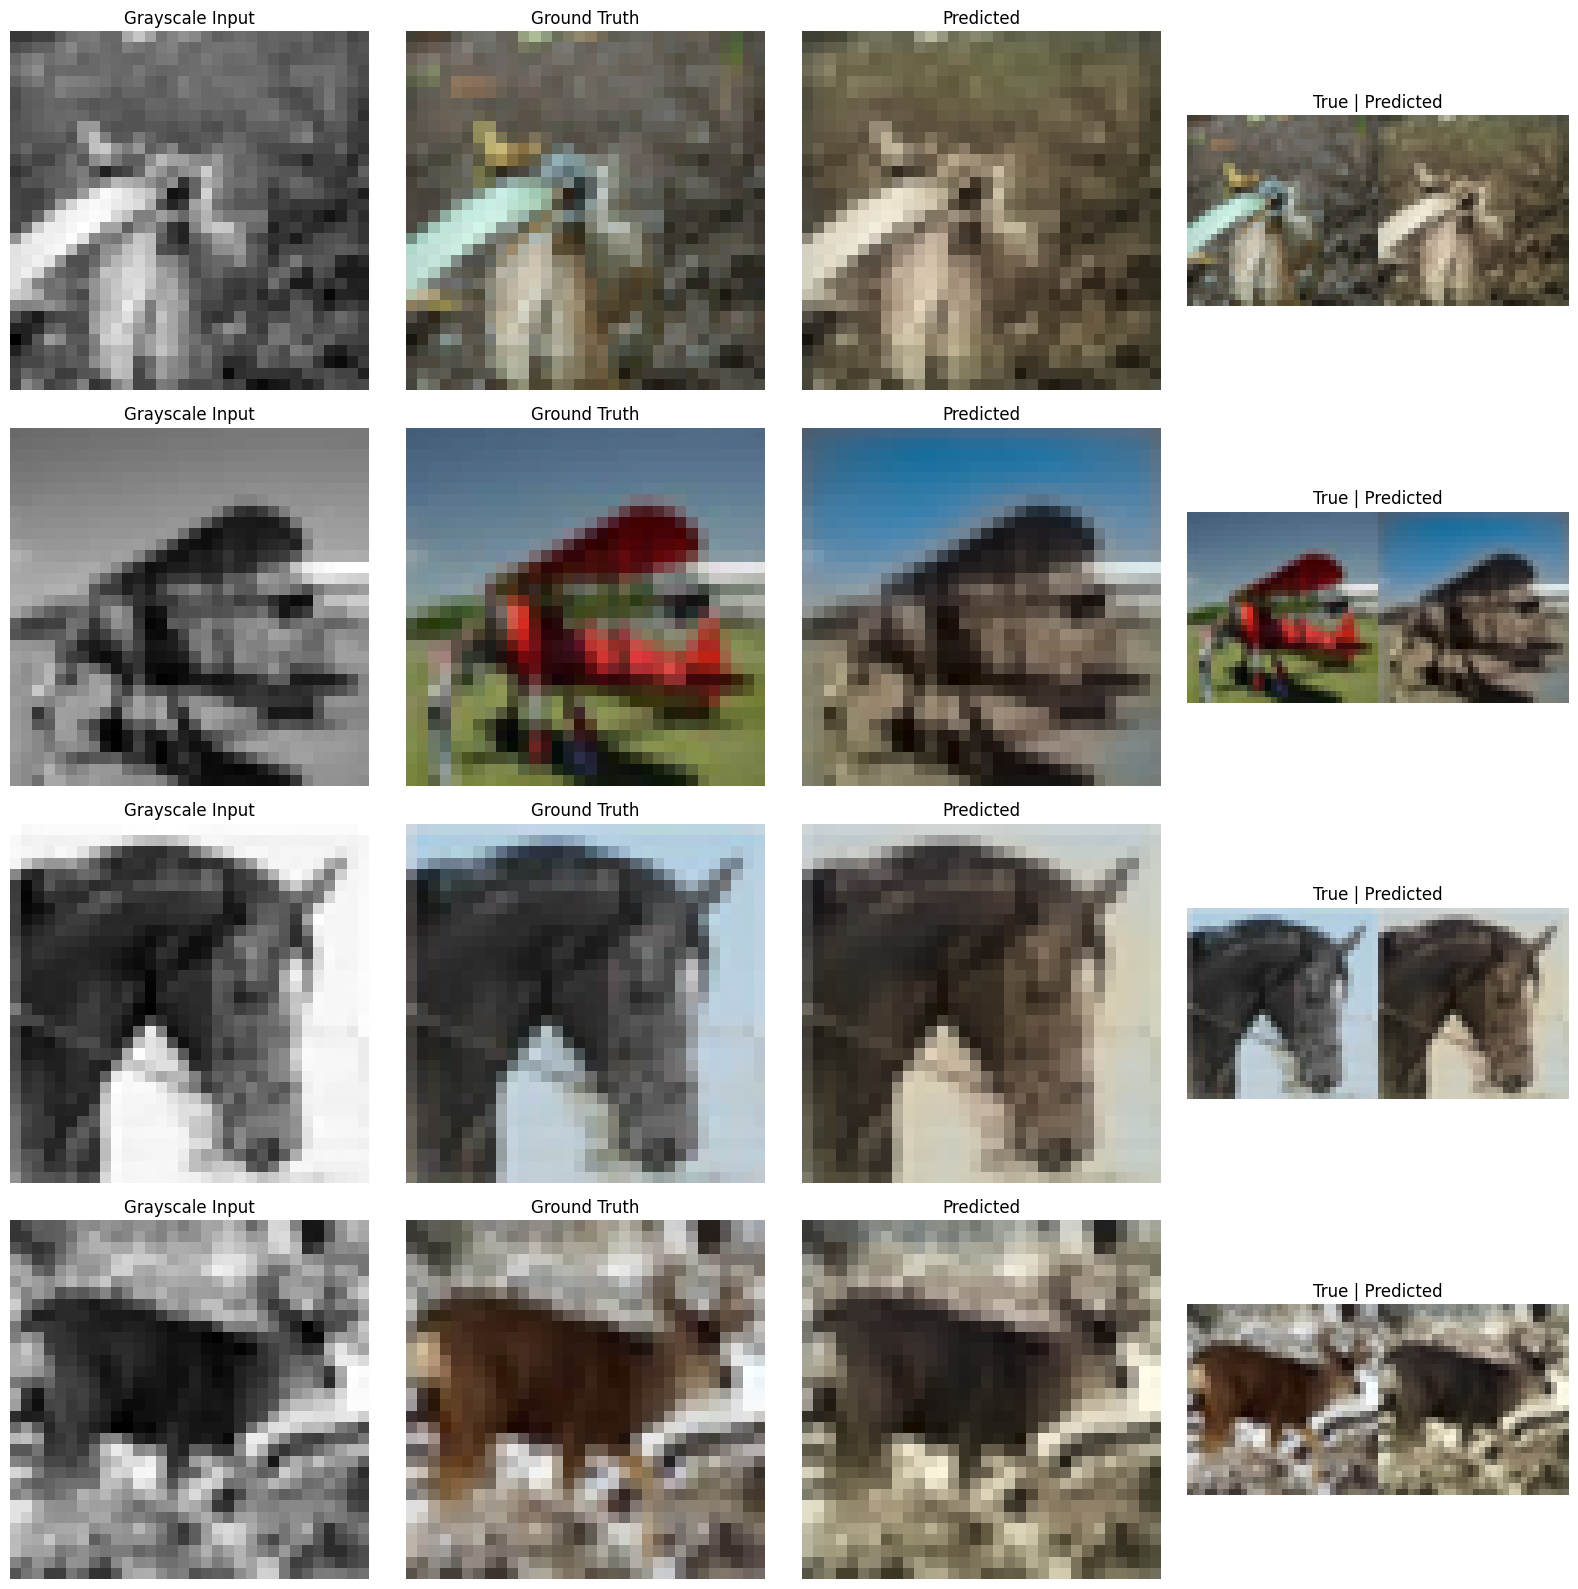

Epoch 21/30, Batch 0, Loss: 0.0119
Epoch 21/30, Batch 100, Loss: 0.0107
Epoch 21/30, Batch 200, Loss: 0.0104
Epoch 21/30, Batch 300, Loss: 0.0098
Epoch 21/30, Batch 400, Loss: 0.0083
Epoch 21/30, Batch 500, Loss: 0.0090
Epoch 21/30, Batch 600, Loss: 0.0076
Epoch 21/30, Batch 700, Loss: 0.0088
Epoch 21/30, Batch 800, Loss: 0.0090
Epoch 21/30, Batch 900, Loss: 0.0137
Epoch 21/30, Batch 1000, Loss: 0.0069
Epoch 21/30, Batch 1100, Loss: 0.0096
Epoch 21/30, Batch 1200, Loss: 0.0093
Epoch 21/30, Batch 1300, Loss: 0.0108
Epoch 21/30, Batch 1400, Loss: 0.0095
Epoch 21/30, Batch 1500, Loss: 0.0086
Epoch 21/30 completed. Average Loss: 0.0094
Epoch 22/30, Batch 0, Loss: 0.0087
Epoch 22/30, Batch 100, Loss: 0.0122
Epoch 22/30, Batch 200, Loss: 0.0123
Epoch 22/30, Batch 300, Loss: 0.0099
Epoch 22/30, Batch 400, Loss: 0.0109
Epoch 22/30, Batch 500, Loss: 0.0078
Epoch 22/30, Batch 600, Loss: 0.0107
Epoch 22/30, Batch 700, Loss: 0.0079
Epoch 22/30, Batch 800, Loss: 0.0175
Epoch 22/30, Batch 900, Loss:

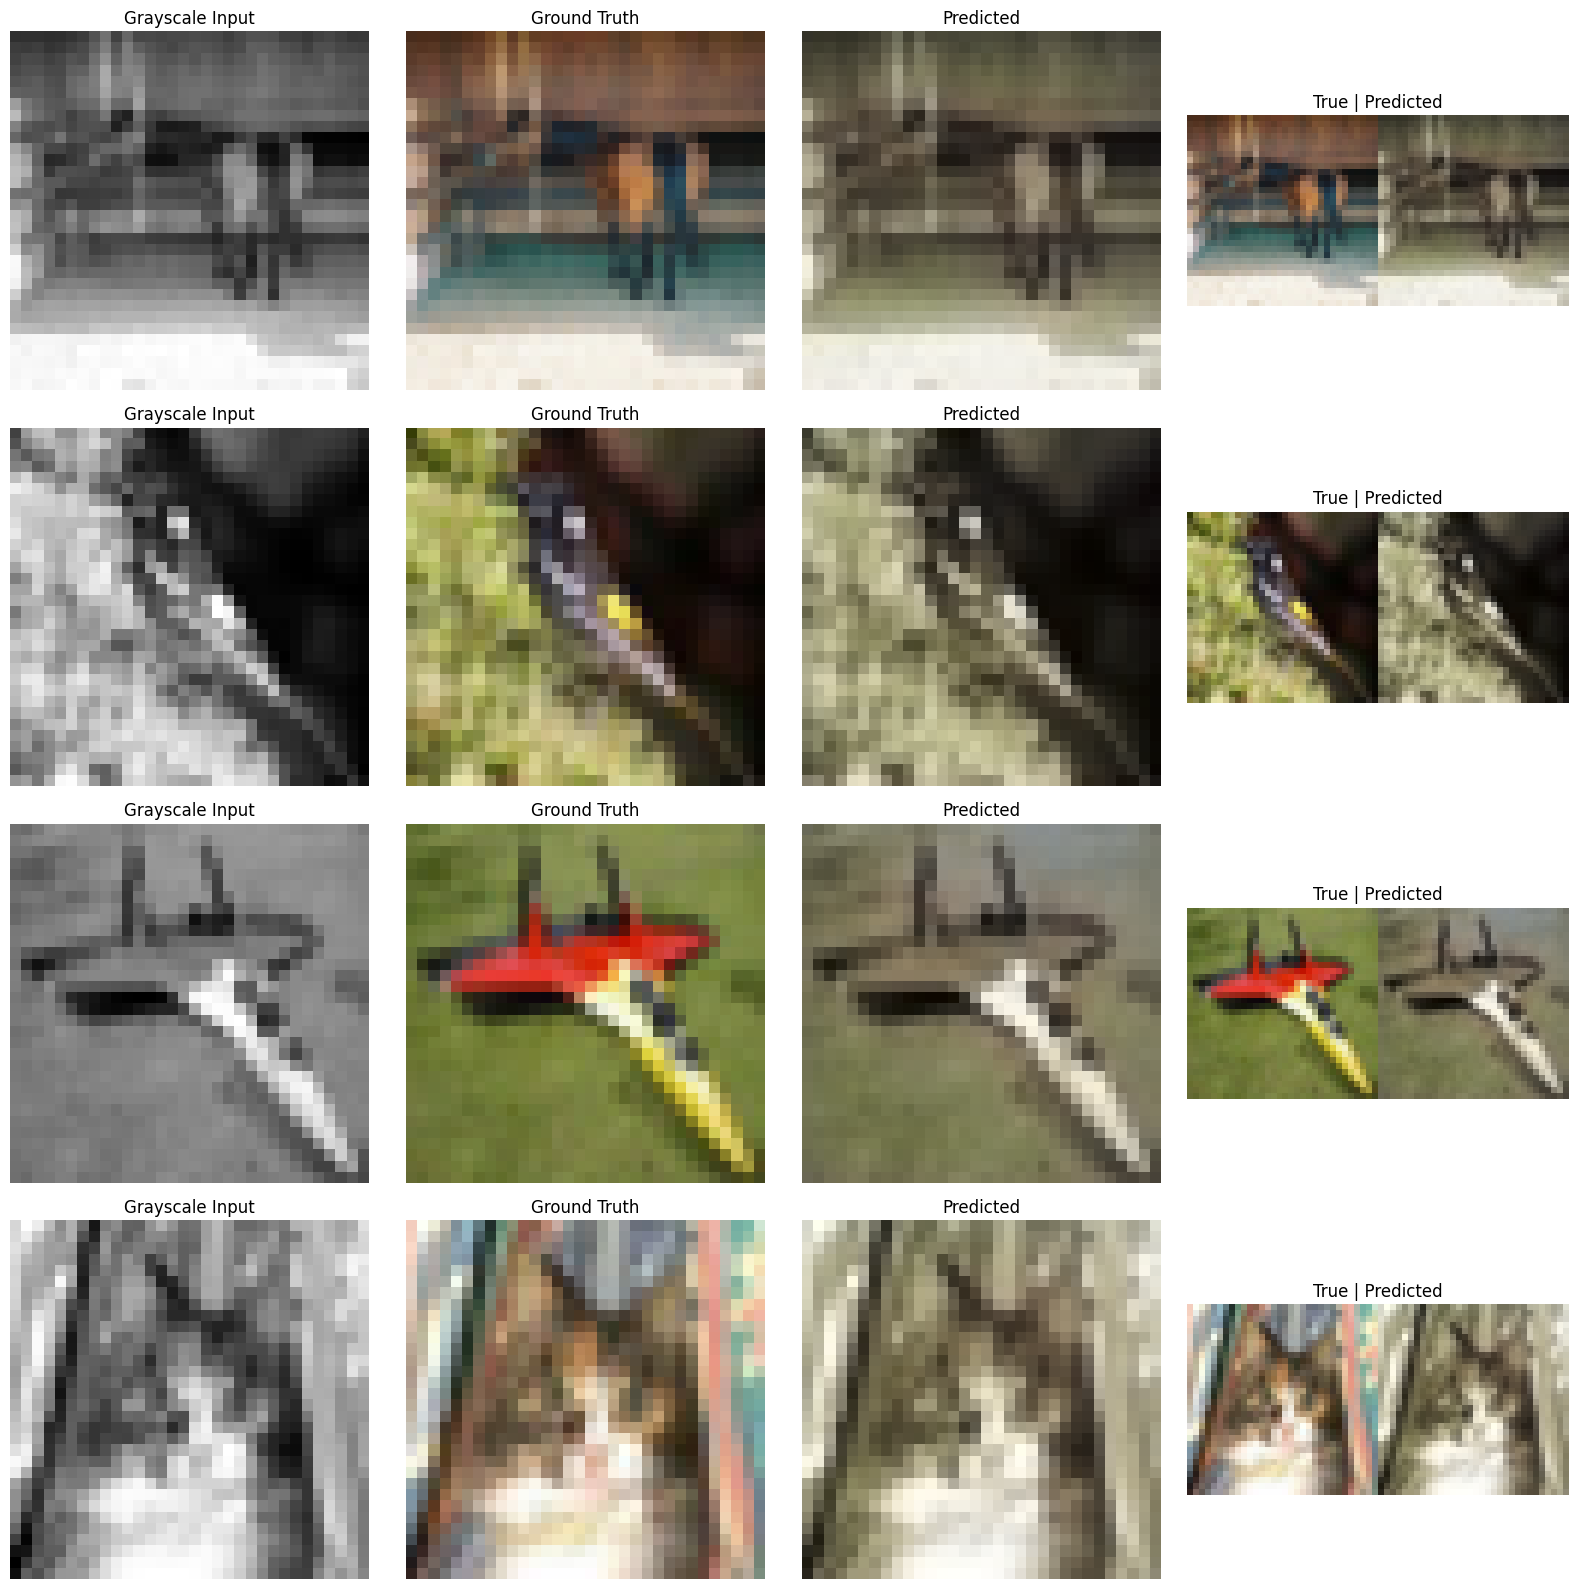

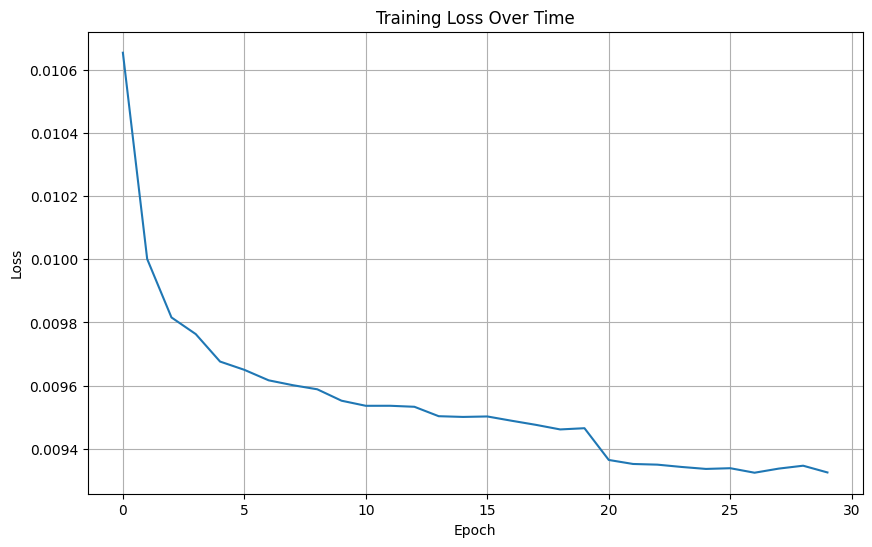

Final evaluation...
Evaluation Loss: 0.0096


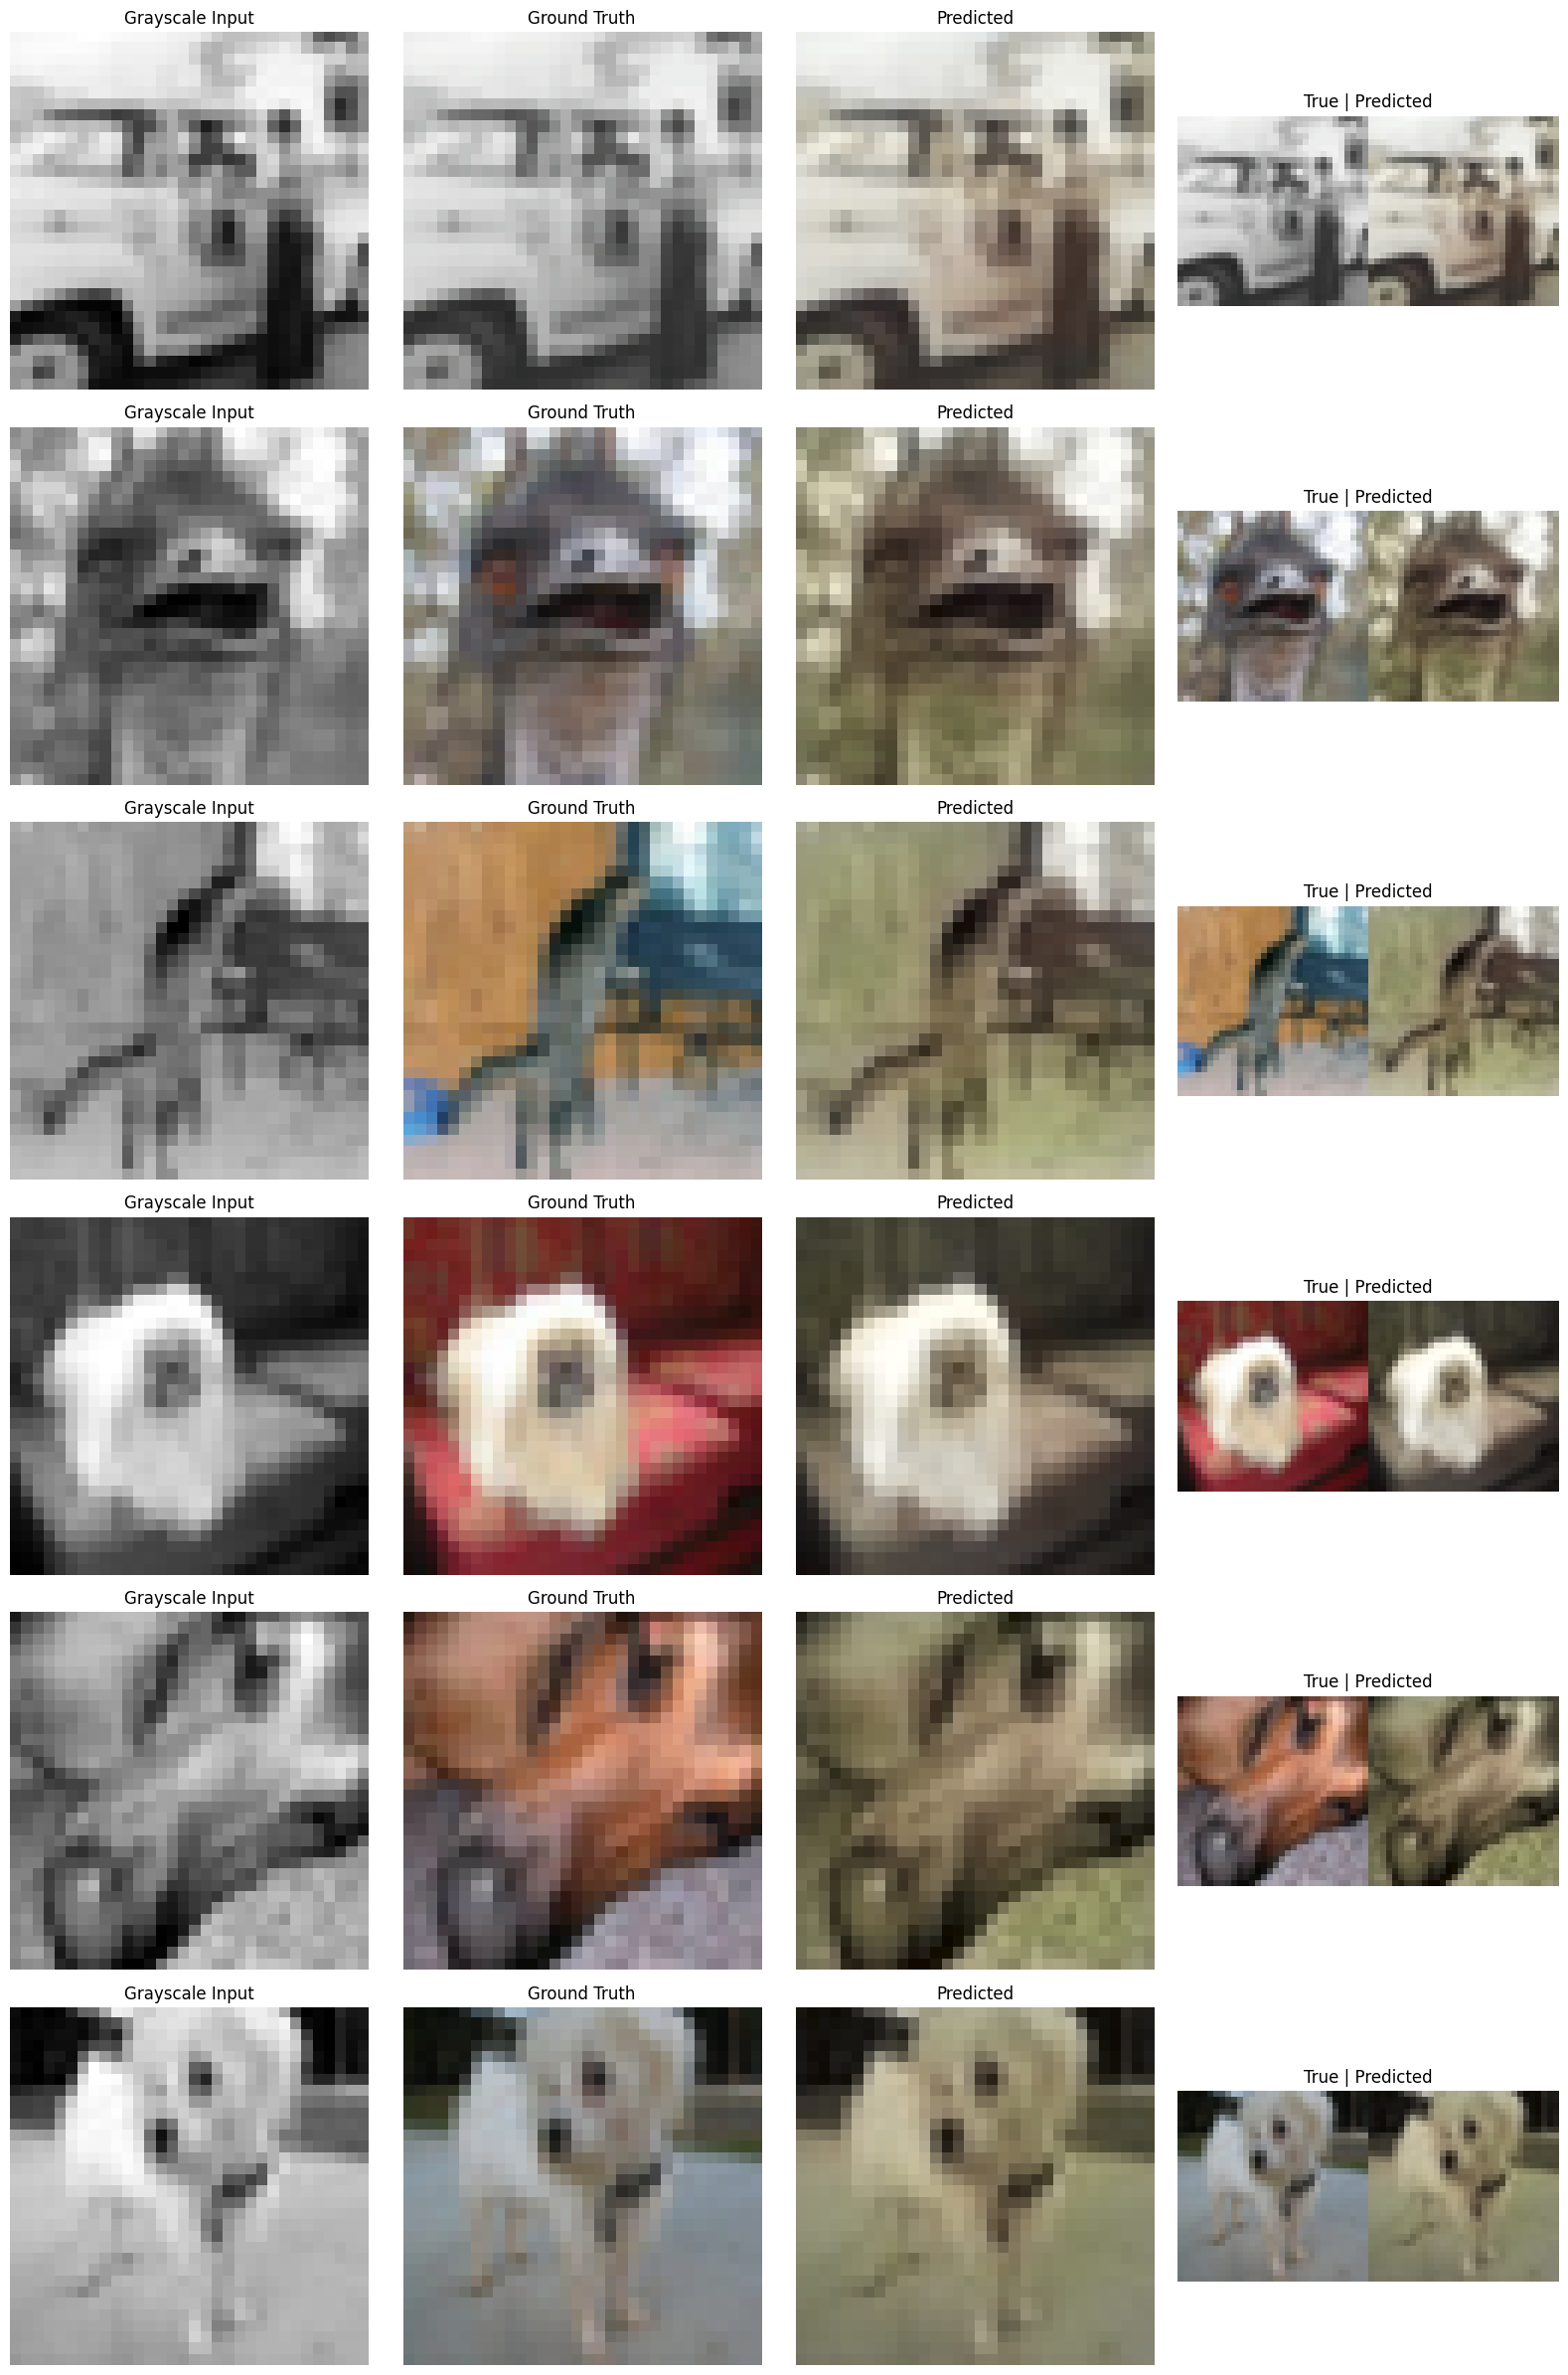

Model saved as 'colorization_model.pth'
Self-supervised image colorization implementation completed!

Key Self-Supervised Learning Concepts Demonstrated:
1. Pretext Task: Predicting color from grayscale
2. No Manual Labels: Using inherent data structure
3. Representation Learning: Learning useful visual features
4. Transfer Learning: Features can be used for other vision tasks


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
import cv2
from PIL import Image
import os

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

class ColorizationDataset(Dataset):
    """
    Custom dataset for image colorization.
    Converts RGB images to LAB colorspace and uses L channel as input,
    ab channels as target for self-supervised learning.
    """
    def __init__(self, root_dir=None, transform=None, use_cifar=True):
        self.transform = transform
        self.use_cifar = use_cifar

        if use_cifar:
            # Use CIFAR-10 for demonstration
            self.dataset = CIFAR10(root='./data', train=True, download=True)
        else:
            # For custom image directory
            self.root_dir = root_dir
            self.image_files = [f for f in os.listdir(root_dir)
                              if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    def __len__(self):
        if self.use_cifar:
            return len(self.dataset)
        else:
            return len(self.image_files)

    def rgb_to_lab(self, img):
        """Convert RGB image to LAB colorspace"""
        img_np = np.array(img).astype(np.float32) / 255.0
        lab = color.rgb2lab(img_np)
        return lab

    def __getitem__(self, idx):
        if self.use_cifar:
            img, _ = self.dataset[idx]
        else:
            img_path = os.path.join(self.root_dir, self.image_files[idx])
            img = Image.open(img_path).convert('RGB')

        # Apply transforms if any
        if self.transform:
            img = self.transform(img)

        # Convert to LAB
        lab = self.rgb_to_lab(img)

        # Split into L and ab channels
        L = lab[:, :, 0]  # Lightness
        ab = lab[:, :, 1:]  # Color channels

        # Normalize L channel to [-1, 1]
        L = (L - 50) / 50

        # Normalize ab channels to [-1, 1]
        ab = ab / 128.0

        # Convert to tensors and add channel dimension for L
        L = torch.FloatTensor(L).unsqueeze(0)  # (1, H, W)
        ab = torch.FloatTensor(ab).permute(2, 0, 1)  # (2, H, W)

        return L, ab

class ResidualBlock(nn.Module):
    """Residual block for better gradient flow"""
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(channels, channels, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(channels)
        self.conv2 = nn.Conv2d(channels, channels, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        residual = x
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += residual
        return self.relu(out)

class ColorizationNet(nn.Module):
    """
    U-Net style architecture for image colorization
    Input: Grayscale image (L channel) - 1 channel
    Output: Color channels (ab) - 2 channels
    """
    def __init__(self):
        super(ColorizationNet, self).__init__()

        # Encoder (Downsampling path)
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 64, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2)

        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 128, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2)

        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv6 = nn.Conv2d(256, 256, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2)

        # Bottleneck with residual blocks
        self.conv7 = nn.Conv2d(256, 512, 3, padding=1)
        self.res_block1 = ResidualBlock(512)
        self.res_block2 = ResidualBlock(512)

        # Decoder (Upsampling path)
        self.up1 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.conv8 = nn.Conv2d(512, 256, 3, padding=1)  # 512 due to skip connection
        self.conv9 = nn.Conv2d(256, 256, 3, padding=1)

        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.conv10 = nn.Conv2d(256, 128, 3, padding=1)
        self.conv11 = nn.Conv2d(128, 128, 3, padding=1)

        self.up3 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.conv12 = nn.Conv2d(128, 64, 3, padding=1)
        self.conv13 = nn.Conv2d(64, 64, 3, padding=1)

        # Final layer
        self.final_conv = nn.Conv2d(64, 2, 1)  # Output 2 channels (ab)

        # Activation functions
        self.relu = nn.ReLU(inplace=True)
        self.tanh = nn.Tanh()  # Output in [-1, 1] range

        # Batch normalization
        self.bn1 = nn.BatchNorm2d(64)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(128)
        self.bn5 = nn.BatchNorm2d(256)
        self.bn6 = nn.BatchNorm2d(256)
        self.bn7 = nn.BatchNorm2d(512)
        self.bn8 = nn.BatchNorm2d(256)
        self.bn9 = nn.BatchNorm2d(256)
        self.bn10 = nn.BatchNorm2d(128)
        self.bn11 = nn.BatchNorm2d(128)
        self.bn12 = nn.BatchNorm2d(64)
        self.bn13 = nn.BatchNorm2d(64)

    def forward(self, x):
        # Encoder
        x1 = self.relu(self.bn1(self.conv1(x)))
        x1 = self.relu(self.bn2(self.conv2(x1)))
        p1 = self.pool1(x1)

        x2 = self.relu(self.bn3(self.conv3(p1)))
        x2 = self.relu(self.bn4(self.conv4(x2)))
        p2 = self.pool2(x2)

        x3 = self.relu(self.bn5(self.conv5(p2)))
        x3 = self.relu(self.bn6(self.conv6(x3)))
        p3 = self.pool3(x3)

        # Bottleneck
        x4 = self.relu(self.bn7(self.conv7(p3)))
        x4 = self.res_block1(x4)
        x4 = self.res_block2(x4)

        # Decoder with skip connections
        u1 = self.up1(x4)
        u1 = torch.cat([u1, x3], dim=1)  # Skip connection
        u1 = self.relu(self.bn8(self.conv8(u1)))
        u1 = self.relu(self.bn9(self.conv9(u1)))

        u2 = self.up2(u1)
        u2 = torch.cat([u2, x2], dim=1)  # Skip connection
        u2 = self.relu(self.bn10(self.conv10(u2)))
        u2 = self.relu(self.bn11(self.conv11(u2)))

        u3 = self.up3(u2)
        u3 = torch.cat([u3, x1], dim=1)  # Skip connection
        u3 = self.relu(self.bn12(self.conv12(u3)))
        u3 = self.relu(self.bn13(self.conv13(u3)))

        # Final output
        output = self.tanh(self.final_conv(u3))

        return output

def lab_to_rgb(L, ab):
    """Convert LAB to RGB for visualization"""
    # Denormalize
    L = L * 50 + 50
    ab = ab * 128

    # Combine L and ab
    lab = np.concatenate([L, ab], axis=0)
    lab = lab.transpose(1, 2, 0)  # (H, W, 3)

    # Convert to RGB
    rgb = color.lab2rgb(lab)
    rgb = np.clip(rgb, 0, 1)

    return rgb

def train_model(model, dataloader, num_epochs=50, learning_rate=0.001):
    """Training loop for the colorization model"""
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

    model.train()
    train_losses = []

    for epoch in range(num_epochs):
        epoch_loss = 0.0
        num_batches = 0

        for batch_idx, (L, ab_true) in enumerate(dataloader):
            L, ab_true = L.to(device), ab_true.to(device)

            # Forward pass
            optimizer.zero_grad()
            ab_pred = model(L)

            # Calculate loss
            loss = criterion(ab_pred, ab_true)

            # Backward pass
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            num_batches += 1

            # Print progress
            if batch_idx % 100 == 0:
                print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}, Loss: {loss.item():.4f}')

        avg_loss = epoch_loss / num_batches
        train_losses.append(avg_loss)
        scheduler.step()

        print(f'Epoch {epoch+1}/{num_epochs} completed. Average Loss: {avg_loss:.4f}')

        # Visualize results every 10 epochs
        if (epoch + 1) % 10 == 0:
            visualize_results(model, dataloader, num_samples=4)

    return train_losses

def visualize_results(model, dataloader, num_samples=4):
    """Visualize colorization results"""
    model.eval()

    with torch.no_grad():
        # Get a batch of data
        L, ab_true = next(iter(dataloader))
        L, ab_true = L.to(device), ab_true.to(device)

        # Predict colors
        ab_pred = model(L)

        # Convert to CPU and numpy
        L = L.cpu().numpy()
        ab_true = ab_true.cpu().numpy()
        ab_pred = ab_pred.cpu().numpy()

        # Create visualization
        fig, axes = plt.subplots(num_samples, 4, figsize=(16, 4*num_samples))

        for i in range(min(num_samples, L.shape[0])):
            # Grayscale input
            gray = (L[i, 0] * 50 + 50) / 100  # Denormalize for display
            axes[i, 0].imshow(gray, cmap='gray')
            axes[i, 0].set_title('Grayscale Input')
            axes[i, 0].axis('off')

            # Ground truth
            rgb_true = lab_to_rgb(L[i], ab_true[i])
            axes[i, 1].imshow(rgb_true)
            axes[i, 1].set_title('Ground Truth')
            axes[i, 1].axis('off')

            # Predicted
            rgb_pred = lab_to_rgb(L[i], ab_pred[i])
            axes[i, 2].imshow(rgb_pred)
            axes[i, 2].set_title('Predicted')
            axes[i, 2].axis('off')

            # Side by side comparison
            comparison = np.concatenate([rgb_true, rgb_pred], axis=1)
            axes[i, 3].imshow(comparison)
            axes[i, 3].set_title('True | Predicted')
            axes[i, 3].axis('off')

        plt.tight_layout()
        plt.show()

    model.train()

def evaluate_model(model, dataloader):
    """Evaluate the model on test data"""
    model.eval()
    total_loss = 0.0
    num_batches = 0
    criterion = nn.MSELoss()

    with torch.no_grad():
        for L, ab_true in dataloader:
            L, ab_true = L.to(device), ab_true.to(device)
            ab_pred = model(L)
            loss = criterion(ab_pred, ab_true)
            total_loss += loss.item()
            num_batches += 1

    avg_loss = total_loss / num_batches
    print(f'Evaluation Loss: {avg_loss:.4f}')
    return avg_loss

# Main execution
if __name__ == "__main__":
    # Data transforms
    transform = transforms.Compose([
        transforms.Resize((32, 32)),  # CIFAR-10 size
        transforms.ToTensor(),
    ])

    # Create datasets
    print("Loading dataset...")
    train_dataset = ColorizationDataset(transform=None, use_cifar=True)

    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)

    # Initialize model
    print("Initializing model...")
    model = ColorizationNet().to(device)

    # Print model summary
    total_params = sum(p.numel() for p in model.parameters())
    print(f"Total parameters: {total_params:,}")

    # Train the model
    print("Starting training...")
    train_losses = train_model(model, train_loader, num_epochs=30, learning_rate=0.001)

    # Plot training loss
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses)
    plt.title('Training Loss Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

    # Final evaluation and visualization
    print("Final evaluation...")
    evaluate_model(model, train_loader)
    visualize_results(model, train_loader, num_samples=6)

    # Save the model
    torch.save(model.state_dict(), 'colorization_model.pth')
    print("Model saved as 'colorization_model.pth'")

# Example of how to use the trained model for inference
def colorize_image(model, image_path):
    """
    Colorize a grayscale image using the trained model
    """
    model.eval()

    # Load and preprocess image
    img = Image.open(image_path).convert('RGB')
    img = img.resize((32, 32))  # Resize to match training size

    # Convert to LAB
    lab = color.rgb2lab(np.array(img).astype(np.float32) / 255.0)
    L = lab[:, :, 0]

    # Normalize and convert to tensor
    L = (L - 50) / 50
    L = torch.FloatTensor(L).unsqueeze(0).unsqueeze(0).to(device)

    # Predict colors
    with torch.no_grad():
        ab_pred = model(L)

    # Convert back to RGB
    L_np = L.squeeze().cpu().numpy()
    ab_np = ab_pred.squeeze().cpu().numpy()

    rgb_result = lab_to_rgb(L_np, ab_np)

    return rgb_result